# 2-D Exploratory Data Analysis

In this notebook we will pick ONE variable you're interested in understanding from your non-census data and plot it against various census variables in scatterplots or dotplots.

### Standard Python and R imports

In [43]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [45]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [46]:
%%R
 
df <- read_csv('merged.csv', show_col_types = FALSE)
df

# A tibble: 127 × 26
       GEOID NAME  populationE populationM med_incE med_incM name1 name2 street1
       <dbl> <chr>       <dbl>       <dbl>    <dbl>    <dbl> <chr> <chr> <chr>  
 1   3.60e10 Cens…        3868         735    66430    14905 New … Bron… 595 Ge…
 2   3.60e10 Cens…        3868         735    66430    14905 NY P… Bron… 579 Co…
 3   3.60e10 Cens…        4444         646    28166     7789 Jewi… <NA>  425 We…
 4   3.60e10 Cens…        2460         539    44667    12046 BASI… <NA>  915 We…
 5   3.60e10 Cens…        2460         539    44667    12046 Puer… Bron… 1420 S…
 6   3.60e10 Cens…        6425        1308    27352    11756 Bron… Inpa… 1265 F…
 7   3.60e10 Cens…        6425        1308    27352    11756 Bron… Outp… 1265 F…
 8   3.60e10 Cens…        6425        1308    27352    11756 Bron… Adul… 1276 F…
 9   3.60e10 Cens…         949         237    45906     7319 Asto… High… 1419 S…
10   3.60e10 Cens…         949         237    45906     7319 Asso… Fast… 1366 I…
# ℹ 117

In [47]:
%%R
colnames(df)

 [1] "GEOID"             "NAME"              "populationE"      
 [4] "populationM"       "med_incE"          "med_incM"         
 [7] "name1"             "name2"             "street1"          
[10] "street2"           "city"              "state"            
[13] "zip"               "phone"             "intake1"          
[16] "intake2"           "intake1a"          "intake2a"         
[19] "service_code_info" "latitude"          "longitude"        
[22] "GEOID.y"           "STATE"             "COUNTY"           
[25] "TRACT"             "BLOCK"            


# Exploratory data analysis



## 2-D visualizations (aka scatter plots)

It seems simple. It's not simple. mainly because...

**CORRELATION =/= CAUSATION**

Comparing variables to one another can be TRICKY!

Let's make some 2-D visualizations (aka scatter plots).

Be VERY careful how you phrase the headlines. Take time to think through what you want to say.




`geom_smooth()` using formula = 'y ~ x'


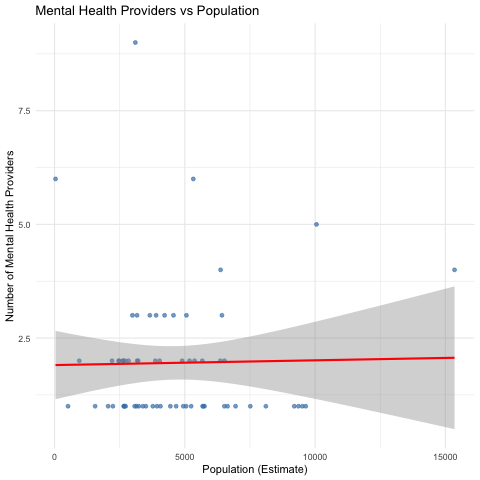

In [57]:
%%R
library(ggplot2)
library(dplyr)


df <- read_csv('merged.csv', show_col_types = FALSE)
df
count_providers <- function(df) {
  provider_counts <- df %>%
    group_by(GEOID, NAME, populationE, med_incE) %>%
    summarize(provider_count = n(), .groups = "drop")
  
  provider_counts$providers_per_1000 <- (provider_counts$provider_count / provider_counts$populationE) * 1000
  
  return(provider_counts)
}

provider_data <- count_providers(df)

plot1 <- ggplot(provider_data, aes(x = populationE, y = provider_count)) +
  geom_point(alpha = 0.7, color = "steelblue") +
  geom_smooth(method = "lm", color = "red", se = TRUE) +
  labs(title = "Mental Health Providers vs Population",
       x = "Population (Estimate)",
       y = "Number of Mental Health Providers") +
  theme_minimal()

print(plot1)

`geom_smooth()` using formula = 'y ~ x'


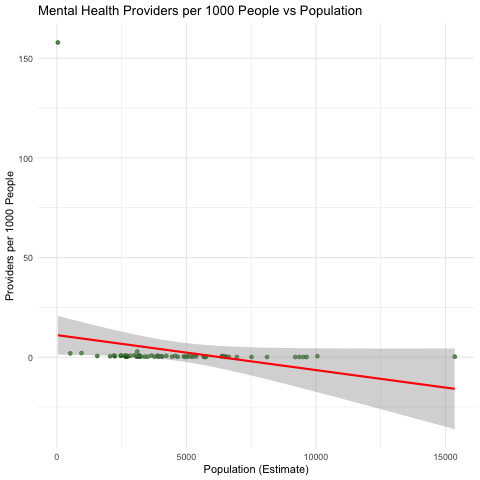

In [59]:
%%R
library(ggplot2)
plot2 <- ggplot(provider_data, aes(x = populationE, y = providers_per_1000)) +
  geom_point(alpha = 0.7, color = "darkgreen") +
  geom_smooth(method = "lm", color = "red", se = TRUE) +
  labs(title = "Mental Health Providers per 1000 People vs Population",
       x = "Population (Estimate)",
       y = "Providers per 1000 People") +
  theme_minimal()
print(plot2)

`geom_smooth()` using formula = 'y ~ x'


In addition: Warning messages:
1: Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`). 
2: Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`). 


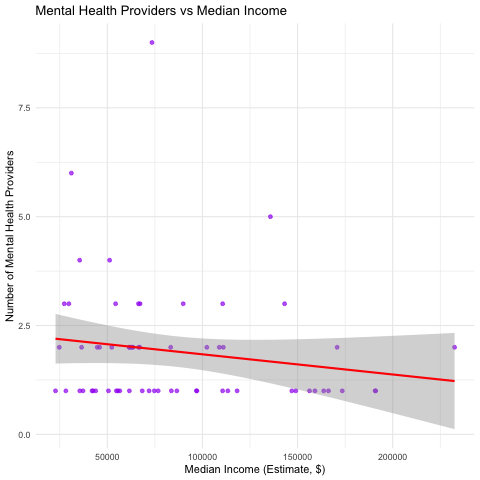

In [67]:
%%R
library(ggplot2)
plot3 <- ggplot(provider_data, aes(x = med_incE, y = provider_count)) +
  geom_point(alpha = 0.7, color = "purple") +
  geom_smooth(method = "lm", color = "red", se = TRUE) +
  labs(title = "Mental Health Providers vs Median Income",
       x = "Median Income (Estimate, $)",
       y = "Number of Mental Health Providers") +
  theme_minimal()
print(plot3)

`geom_smooth()` using formula = 'y ~ x'


In addition: Warning messages:
1: Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`). 
2: Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`). 


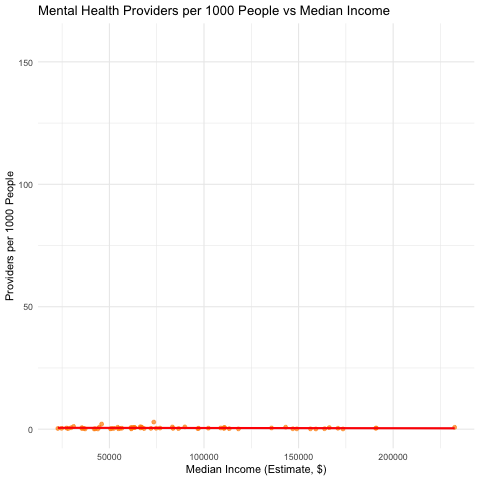

In [61]:
%%R
library(ggplot2)
plot4 <- ggplot(provider_data, aes(x = med_incE, y = providers_per_1000)) +
  geom_point(alpha = 0.7, color = "darkorange") +
  geom_smooth(method = "lm", color = "red", se = TRUE) +
  labs(title = "Mental Health Providers per 1000 People vs Median Income",
       x = "Median Income (Estimate, $)",
       y = "Providers per 1000 People") +
  theme_minimal()
print(plot4)

In [65]:
%%R
provider_data

# A tibble: 65 × 7
      GEOID NAME  populationE med_incE provider_count providers_per_1000 borough
      <dbl> <chr>       <dbl>    <dbl>          <int>              <dbl> <chr>  
 1  3.60e10 Cens…        3868    66430              2              0.517 Bronx  
 2  3.60e10 Cens…        4444    28166              1              0.225 Bronx  
 3  3.60e10 Cens…        2460    44667              2              0.813 Bronx  
 4  3.60e10 Cens…        6425    27352              3              0.467 Bronx  
 5  3.60e10 Cens…         949    45906              2              2.11  Bronx  
 6  3.60e10 Cens…        5062    29747              3              0.593 Bronx  
 7  3.60e10 Cens…         517       NA              1              1.93  Bronx  
 8  3.60e10 Cens…          38       NA              6            158.    Bronx  
 9  3.60e10 Cens…        5672    24728              2              0.353 Bronx  
10  3.60e10 Cens…        6374    35431              4              0.628 Bronx  
# ℹ 55 mo